# E-Commerce Marketing Analytics(Customer Behavior & Growth Analytics)

# 1. ETL & Cleaning

Import modules

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

### Step1: Extract and Inspect

Import all needed datasets

In [2]:
tax_amount=pd.read_excel("/Users/z/Desktop/For work/For github/E-Commerce Marketing Analytics_ From Raw Data to Business Insights/dataset/Tax_amount.xlsx")
online_sales=pd.read_csv("/Users/z/Desktop/For work/For github/E-Commerce Marketing Analytics_ From Raw Data to Business Insights/dataset/Online_Sales.csv")
market_spend=pd.read_csv("/Users/z/Desktop/For work/For github/E-Commerce Marketing Analytics_ From Raw Data to Business Insights/dataset/Marketing_Spend.csv")
discount_coupon=pd.read_csv("/Users/z/Desktop/For work/For github/E-Commerce Marketing Analytics_ From Raw Data to Business Insights/dataset/Discount_Coupon.csv")
customers=pd.read_excel("/Users/z/Desktop/For work/For github/E-Commerce Marketing Analytics_ From Raw Data to Business Insights/dataset/CustomersData.xlsx")

Clean the datasets one by one

tax_amount dataset should be a categorical dataset.

In [3]:
tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


online_sales is a dataset that includes the information collected from customers.

In [4]:
#check fort the missing values
online_sales
missing_sales = online_sales.isnull()
for i in missing_sales.columns:
    print(missing_sales[i].value_counts())

CustomerID
False    52924
Name: count, dtype: int64
Transaction_ID
False    52924
Name: count, dtype: int64
Transaction_Date
False    52924
Name: count, dtype: int64
Product_SKU
False    52924
Name: count, dtype: int64
Product_Description
False    52924
Name: count, dtype: int64
Product_Category
False    52924
Name: count, dtype: int64
Quantity
False    52924
Name: count, dtype: int64
Avg_Price
False    52924
Name: count, dtype: int64
Delivery_Charges
False    52924
Name: count, dtype: int64
Coupon_Status
False    52924
Name: count, dtype: int64


Luckily, there are no missing values needed to be handled with.

In [5]:
online_sales.describe

<bound method NDFrame.describe of        CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           17850           16679         1/1/2019  GGOENEBJ079499   
1           17850           16680         1/1/2019  GGOENEBJ079499   
2           17850           16681         1/1/2019  GGOEGFKQ020399   
3           17850           16682         1/1/2019  GGOEGAAB010516   
4           17850           16682         1/1/2019  GGOEGBJL013999   
...           ...             ...              ...             ...   
52919       14410           48493       12/31/2019  GGOENEBB078899   
52920       14410           48494       12/31/2019  GGOEGAEB091117   
52921       14410           48495       12/31/2019  GGOENEBQ084699   
52922       14600           48496       12/31/2019  GGOENEBQ079199   
52923       14600           48497       12/31/2019  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - St

In [6]:
market_spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [7]:
discount_coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [8]:
customers

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


### Step2: Transform

To better merge these dataset and further research, I need to do some changes to the column names and there value formats.

In [9]:
#Print the same column name among these dataset
dfs = [tax_amount,online_sales,market_spend,discount_coupon,customers]
for i,x in enumerate(dfs):
    xx=set(x.columns)
    for d,y in enumerate(dfs):
        yy=set(y.columns)
        if i != d:
                print(i,d,xx.intersection(yy))

0 1 {'Product_Category'}
0 2 set()
0 3 {'Product_Category'}
0 4 set()
1 0 {'Product_Category'}
1 2 set()
1 3 {'Product_Category'}
1 4 {'CustomerID'}
2 0 set()
2 1 set()
2 3 set()
2 4 set()
3 0 {'Product_Category'}
3 1 {'Product_Category'}
3 2 set()
3 4 set()
4 0 set()
4 1 {'CustomerID'}
4 2 set()
4 3 set()


Apparently, there is something wrong with the dataset "market_spend"，I have to look into it.   
Besides, it's good that there are no duplicate column names to deal with.

Market_spend is actually the cost everday within the year 2019.

### Optimization of numerical variables

In [10]:
#fill the null value for keep all category remaining after we merge
discount_coupon['Discount_pct'].fillna(0)
tax_amount['GST'].fillna(0)

#Generate a total spend variable
online_sales['Total'] = online_sales['Avg_Price']*online_sales['Quantity']+online_sales['Delivery_Charges']
market_spend['Total_Spend'] = market_spend['Offline_Spend']+market_spend['Online_Spend']

#rescale some relevant data for further regression analysis
online_sales['Total_log'] = np.log1p(online_sales['Total'])
market_spend['Total_Spend_log']=np.log1p(market_spend['Total_Spend'])

#remove some outliers
discount_coupon = discount_coupon[(discount_coupon['Discount_pct']<100)&(discount_coupon['Discount_pct']>0)]

#drop underlying duplicates
online_sales.drop_duplicates(inplace=True)

### Standardization of categorical variables

In [11]:
#standardize gender value
customers['Gender'].replace({'M':'Male'},inplace=True)
customers['Gender'].replace({'F':'Female'},inplace=True)

/var/folders/9z/fn38q01s6j12lx0338x717jh0000gn/T/ipykernel_82391/819532168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Gender'].replace({'M':'Male'},inplace=True)


Other categorical varibales of names are highly consistent.

### Processing of time variables

I notice that the discount_coupon is only with month about the date, so I might need some individual month information for further search.

In [12]:
market_spend.rename(columns={"Date":"Transaction_Date"},inplace = True)

In [13]:
#Extract the time dimensions
online_sales[['Month','Day','Year']] = online_sales['Transaction_Date'].apply(lambda x: str(x)).str.split('/',expand=True).applymap(lambda x: int(x))
market_spend[['Month','Day','Year']] = market_spend['Transaction_Date'].apply(lambda x: str(x)).str.split('/',expand=True).applymap(lambda x: int(x))

#Transform the month in string format to numeric.
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
discount_coupon['Month'] = discount_coupon['Month'].map(month_map)

#Transform the date from object to datetime format
online_sales['Transaction_Date']=pd.to_datetime(online_sales['Transaction_Date'])
market_spend['Transaction_Date']=pd.to_datetime(market_spend['Transaction_Date'])

/var/folders/9z/fn38q01s6j12lx0338x717jh0000gn/T/ipykernel_82391/4116127934.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  online_sales[['Month','Day','Year']] = online_sales['Transaction_Date'].apply(lambda x: str(x)).str.split('/',expand=True).applymap(lambda x: int(x))
/var/folders/9z/fn38q01s6j12lx0338x717jh0000gn/T/ipykernel_82391/4116127934.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  market_spend[['Month','Day','Year']] = market_spend['Transaction_Date'].apply(lambda x: str(x)).str.split('/',expand=True).applymap(lambda x: int(x))


### Bins Creation

In [14]:
#create customer bins by their total spend in 2019 accumulating all the transactions
customer_grp=online_sales.groupby('CustomerID',as_index=False)['Total'].sum()
c_bins = np.linspace(min(customer_grp['Total']),max(customer_grp['Total']),5)
group = ['Low','Mid','High','VIP']
customer_grp['Customer_bins']=pd.cut(customer_grp['Total'],c_bins,labels=group,include_lowest=True,duplicates="drop")
customer_grp.drop('Total',axis=1,inplace=True)
online_sales = pd.merge(online_sales,customer_grp,on='CustomerID',how='left')

#create an another bins by their order frequency
customer_grp2=online_sales.groupby('CustomerID',as_index=False)['CustomerID'].size().rename(columns={'size': 'Frequency'})
customer_grp2['Frequency_bins']=pd.qcut(customer_grp2['Frequency'],4,labels=group)
online_sales = online_sales.merge(customer_grp2[['CustomerID', 'Frequency_bins']],on='CustomerID', how='left')

#synthesize the category
online_sales['Level']=np.nan
online_sales.loc[(online_sales['Customer_bins'] == 'VIP') & (online_sales['Frequency_bins'] == 'VIP'),'Level'] = 1
online_sales.loc[(online_sales['Customer_bins'] == 'Low') | (online_sales['Frequency_bins'] == 'Low'),'Level'] = 3
online_sales['Level'].fillna(2, inplace=True)

#Create cost bins
grp=market_spend.groupby('Transaction_Date',as_index=False)['Total_Spend'].sum()
bins = np.linspace(min(grp['Total_Spend']),max(grp['Total_Spend']),4)
group = ['Low','Mid','High']
grp['Cost_bins']=pd.cut(grp['Total_Spend'],bins,labels=group,include_lowest=True,duplicates="drop")
market_spend = pd.merge(market_spend,grp[['Cost_bins','Transaction_Date']],on='Transaction_Date',how='left')

/var/folders/9z/fn38q01s6j12lx0338x717jh0000gn/T/ipykernel_82391/1890385822.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  online_sales['Level'].fillna(2, inplace=True)


### Step3: Merge all the datasets

Generate fact_sales first as baseline

In [15]:
# 1) Customers（CustomerID）
fact_sales = online_sales.merge(customers, on='CustomerID', how='left', validate='m:1')

# 2) Tax（Product_Category）
fact_sales = fact_sales.merge(tax_amount, on='Product_Category', how='left', validate='m:1')

# 3) Discount（Month + Product_Category）
online_sales['Month'] = online_sales['Transaction_Date'].dt.month.astype(int)
discount_coupon['Month'] = discount_coupon['Month'].astype(int)
fact_sales = fact_sales.merge(discount_coupon[['Month','Product_Category','Coupon_Code','Discount_pct']],on=['Month','Product_Category'], how='left', validate='m:1')

# 4) Calculate some derived variables
fact_sales['discount_amount'] = (fact_sales['Total'] * fact_sales['Discount_pct'].fillna(0)/100).round(2)
fact_sales['tax_amount'] = (fact_sales['Total'] * fact_sales['GST'].fillna(0)).round(2)
fact_sales['net_amount'] = (fact_sales['Total'] - ((fact_sales['Coupon_Status']=='Used')*fact_sales['discount_amount']) + fact_sales['tax_amount']).round(2)

In [16]:
fact_sales.describe

<bound method NDFrame.describe of        CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           17850           16679       2019-01-01  GGOENEBJ079499   
1           17850           16680       2019-01-01  GGOENEBJ079499   
2           17850           16681       2019-01-01  GGOEGFKQ020399   
3           17850           16682       2019-01-01  GGOEGAAB010516   
4           17850           16682       2019-01-01  GGOEGBJL013999   
...           ...             ...              ...             ...   
52919       14410           48493       2019-12-31  GGOENEBB078899   
52920       14410           48494       2019-12-31  GGOEGAEB091117   
52921       14410           48495       2019-12-31  GGOENEBQ084699   
52922       14600           48496       2019-12-31  GGOENEBQ079199   
52923       14600           48497       2019-12-31  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - St

Generate some derived fact_marketing tables

day-level

In [17]:
#Aggregate the fact_sales to make granularity consistent with some day-level data
sales_by_day = fact_sales.groupby('Transaction_Date',as_index=False,).agg(
    net_amount=('net_amount','sum'),
    orders=('Transaction_ID','nunique'),
    customers=('CustomerID','nunique')
)

marketing_by_day = (market_spend.rename(columns={'Total_Spend':'spend'})[['Transaction_Date','spend']])

#Merge
sales_day_with_spend=sales_by_day.merge(marketing_by_day,on="Transaction_Date",how='left')

#Calculate the ROI
sales_day_with_spend['ROI'] = (sales_day_with_spend['net_amount'] - sales_day_with_spend['spend'])/sales_day_with_spend['spend']

product-category level

In [18]:
dim_product = (
    fact_sales
    .groupby('Product_Category', as_index=False)
    .agg(
        total_sales=('net_amount', 'sum'),
        total_orders=('Transaction_ID', 'nunique'),
        unique_customers=('CustomerID', 'nunique'),
        avg_order_value=('Total', 'mean'),
        avg_discount_pct=('Discount_pct', 'mean'),
        avg_tax_rate=('GST', 'mean')
    )
)
#For further calculation of profit margin or discount sensitivity indicator
dim_product['avg_discount_pct'] = dim_product['avg_discount_pct'].fillna(0).round(2)
dim_product['avg_tax_rate'] = dim_product['avg_tax_rate'].fillna(0).round(3)

In [19]:
dim_product

,Product_Category,total_sales,total_orders,unique_customers,avg_order_value,avg_discount_pct,avg_tax_rate
0,Accessories,10367.25,191,150,43.090385,20.73,0.10
1,Android,1128.49,43,42,25.063256,20.47,0.10
2,Apparel,855334.90,8129,1323,42.370641,20.04,0.18
3,Backpacks,10929.25,84,75,111.636067,0.00,0.10
4,Bags,198232.65,1545,728,94.027354,19.77,0.18
5,Bottles,10161.20,258,203,38.912761,19.59,0.05
6,Drinkware,280754.62,2524,919,72.017229,19.87,0.18
7,Fun,9333.07,146,118,49.433250,0.00,0.18
8,Gift Cards,19498.06,157,77,122.854214,16.23,0.05
9,Google,13449.51,105,89,116.445333,0.00,0.10


customer-level

In [20]:
customers

,CustomerID,Gender,Location,Tenure_Months
0,17850,Male,Chicago,12
1,13047,Male,California,43
2,12583,Male,Chicago,33
3,13748,Female,California,30
4,15100,Male,California,49
...,...,...,...,...
1463,14438,Female,New York,41
1464,12956,Female,Chicago,48
1465,15781,Male,New Jersey,19
1466,14410,Female,New York,45


In [21]:
#Regarding granularity
dim_customer = (
    fact_sales
    .groupby('CustomerID', as_index=False)
    .agg(
        total_spent=('net_amount', 'sum'),
        total_orders=('Transaction_ID', 'nunique'),
        unique_categories=('Product_Category', 'nunique'),
        last_purchase=('Transaction_Date', 'max'),
        avg_order_value=('Total', 'mean'),
        avg_discount_pct=('Discount_pct', 'mean')
    )
)
dim_customer['avg_discount_pct'] = dim_customer['avg_discount_pct'].fillna(0).round(2)
#for merging
dim_customer=dim_customer.merge(customers,on='CustomerID',how='left')

#Customers lifecycle metrics
today = fact_sales['Transaction_Date'].max()
dim_customer['days_since_last_purchase'] = (today - dim_customer['last_purchase']).dt.days

In [22]:
dim_customer

,CustomerID,total_spent,total_orders,unique_categories,last_purchase,avg_order_value,avg_discount_pct,Gender,Location,Tenure_Months,days_since_last_purchase
0,12346,152.39,1,2,2019-09-15,90.495000,30.00,Female,New York,31,107
1,12347,15819.19,31,10,2019-11-02,241.667333,25.08,Male,New York,20,59
2,12348,1721.94,8,6,2019-10-19,71.272609,24.78,Male,California,39,73
3,12350,1487.44,11,4,2019-12-14,87.526471,30.00,Male,California,25,17
4,12356,2091.83,13,7,2019-09-15,57.776667,30.00,Female,Chicago,31,107
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,891.35,3,4,2019-04-05,117.524286,10.00,Female,California,5,270
1464,18260,3051.70,19,11,2019-10-05,74.886750,22.05,Male,New York,43,87
1465,18269,174.31,2,2,2019-06-20,19.132500,12.50,Male,Chicago,25,194
1466,18277,334.40,1,1,2019-10-23,304.000000,10.00,Female,Chicago,47,69


# 2. A/B Test

### 2.1 Goal:

Evaluate whether discount coupons improve ***conversion rate and revenue*** per customer.

### 2.2 Hypothesis:

H₁: Customers exposed to discount coupons generate higher average revenue and conversion rates than those not exposed.  

H₀: There is no difference between the two groups.


### 2.3 Define Treatment and Control

Control Group (A):coupon_status is 'Not Used' or 'Clicked' which means coupon was available but not applied  
Treatment Group (B):coupon_status is 'Used' which means coupon was applied at checkout

In [23]:
fact_sales['AB_Groups']=fact_sales['Coupon_Status'].replace({
    'Used':'B',
    'Clicked':'A',
    'Not Used':'A'
})

### 2.4 Define KPIs

| **KPI** | **Description** | **Formula** |
|----------|-----------------|--------------|
| **Revenue** | Net amount per order deducted the taxes and discounts | `net_amount` |
| **Average Order Value (AOV)** | Average net amount per order | `mean(net_amount)` |
| **Revenue per Customer (RPU)** | Total sales / unique customers | `sum(net_amount) / nunique(CustomerID)` |
| **Conversion Rate** | % of transactions using coupon | `n_orders_with_coupon / n_total_orders` |
| **Discount Efficiency** | Ratio of discount cost to incremental sales | `(ΔRevenue / ΔDiscount)` |

### 2.5 Data Aggregation

### Table 1:
**Granularity:** one row per order from `fact_sales`.

**Treatment definition**
- **B (treatment):** `Coupon_Status == 'Used'`
- **A (control):** `Coupon_Status in {'Not Used','Clicked'}`

**Primary outcome:** `net_amount`  
**Secondary outcomes:** `Total`, AOV at order level (= `net_amount` as mean), conversion rate (= mean of `used_coupon`).

**Why order level?** Answers “Does applying a coupon on an order increase revenue for that order?”  
**Stat caveat:** Same `CustomerID` may appear multiple times → observations are not independent → use **cluster-robust SE by `CustomerID`** in the model.

In [24]:
# 1) Order-level coupon indicator (for conversion KPI)
fact_sales['used_coupon'] = (fact_sales['Coupon_Status'] == 'Used').astype(int)

# 2) Dataset 1 is simply the order-panel itself (keep needed columns)
cols_a = [
    'Transaction_ID', 'Transaction_Date', 'Month','Day','Year',
    'CustomerID', 'Product_Category',
    'Gender','Location','Tenure_Months',
    'Customer_bins','Frequency_bins','Level',
    'Coupon_Status','AB_Groups','used_coupon',
    'net_amount','Total'
]
orders = fact_sales[cols_a].copy()

### 1) Sanity & Balance Checks (before testing)

We ensure the A/B groups are comparable:

1. **Sizes:** number of orders and unique customers per group.  
2. **Categorical composition:** chi-square tests across `Gender`, `Location`, `Customer_bins`, `Frequency_bins`, `Level`, `Product_Category`.  
3. **Numeric balance:** Welch t-test for `Tenure_Months`.  
4. **Temporal balance:** compare order counts by `Month` across groups.

In [ ]:
# 1) Sizes
sizes = (
    orders.groupby('AB_Groups', as_index=False)
          .agg(n_orders=('Transaction_ID','nunique'),
               n_customers=('CustomerID','nunique'))
)
print("Sizes (orders & unique customers):\n", sizes, "\n")

# 2) Categorical chi-square balance tests
cat_cols = ['Gender','Location','Customer_bins','Frequency_bins','Level','Product_Category']
chi_results = {}
for c in cat_cols:
    tab = pd.crosstab(orders[c], orders['AB_Groups'])
    if tab.shape[0] > 1 and tab.shape[1] > 1:
        chi2, p, dof, _ = chi2_contingency(tab)
        chi_results[c] = {'chi2': chi2, 'pvalue': p, 'dof': dof, 'n_levels': tab.shape[0]}
    else:
        chi_results[c] = {'chi2': np.nan, 'pvalue': np.nan, 'note': 'Insufficient variation'}
print("Chi-square balance (categoricals):")
for k,v in chi_results.items():
    print(f"  {k}: p={v.get('pvalue'):.4g}" if pd.notnull(v.get('pvalue')) else f"  {k}: {v.get('note')}")
print()

# 3) Numeric balance: f for Tenure_Months
ten_a = orders.loc[orders['AB_Groups']=='A', 'Tenure_Months'].dropna()
ten_b = orders.loc[orders['AB_Groups']=='B', 'Tenure_Months'].dropna()
if len(ten_a)>2 and len(ten_b)>2:
    t_bal, p_bal = ttest_ind(ten_b, ten_a, equal_var=False)
    print(f"Tenure_Months balance — Welch t: t={t_bal:.3f}, p={p_bal:.4g}")
else:
    print("Tenure_Months balance — not enough data.")
print()

# 4) Temporal balance: orders by Month × group (table only)
print("Orders by Month * Group:")
print(pd.crosstab(orders['Month'], orders['AB_Groups']), "\n")

Sizes (orders & unique customers):
   AB_Groups  n_orders  n_customers
0         A     19455         1440
1         B     12258         1374 

Chi-square balance (categoricals):
  Gender: p=0.7957
  Location: p=0.4248
  Customer_bins: p=0.1545
  Frequency_bins: p=0.5993
  Level: p=0.2405
  Product_Category: p=0.5117

Tenure_Months balance — Welch t: t=0.098, p=0.9215

Orders by Month * Group:
AB_Groups     A     B
Month                
1          2680  1383
2          2186  1098
3          2870  1476
4          2720  1430
5          3080  1492
6          2774  1419
7          3494  1757
8          4057  2093
9          2798  1490
10         2754  1410
11         2597  1364
12         3010  1492 



Groups A/B are well-balanced across all dimensions (demographics, tenure, and month); no pre-test bias detected.

### 2) Primary Effect Tests (order-level)

- **Quick check:** Welch t-test on `net_amount` (B vs A).  
- **Main model:** OLS with treatment indicator and **cluster-robust SE by `CustomerID`**:
  
  `net_amount ~ 1 + 1(AB_Groups=='B')`
  
Optionally include observed covariates to adjust imbalances:

  `net_amount ~ treat + C(Gender)+C(Location)+C(Customer_bins)+C(Frequency_bins)+C(Level)+Tenure_Months`

In [54]:
##Welch t-test + Cluster-robust OLS
#Quick check: Welch t-test
y_a = orders.loc[orders['AB_Groups']=='A', 'net_amount'].dropna()
y_b = orders.loc[orders['AB_Groups']=='B', 'net_amount'].dropna()

t_stat, p_val = ttest_ind(y_b, y_a, equal_var=False)
mean_diff = y_b.mean() - y_a.mean()
se = np.sqrt(y_b.var(ddof=1)/len(y_b) + y_a.var(ddof=1)/len(y_a))
ci = (mean_diff - 1.96*se, mean_diff + 1.96*se)

print(f"Welch t-test on net_amount — t={t_stat:.3f}, p={p_val:.4g}")
print(f"Mean diff (B-A) = {mean_diff:.2f}; 95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]\n")

#Cluster-robust OLS (no covariates) 
orders['treat'] = (orders['AB_Groups'] == 'B').astype(int)
m0 = smf.ols('net_amount ~ treat', data=orders).fit(
    cov_type='cluster', cov_kwds={'groups': orders['CustomerID']}
)
print(m0.summary())

#Cluster-robust OLS (with observed covariates)
formula_cov = (
    "net_amount ~ treat"
    " + C(Gender) + C(Location)"
    " + C(Customer_bins) + C(Frequency_bins) + C(Level)"
    " + Tenure_Months"
)
m1 = smf.ols(formula_cov, data=orders).fit(
    cov_type='cluster', cov_kwds={'groups': orders['CustomerID']}
)
print("\nModel with covariates (cluster-robust by CustomerID):")
print(m1.summary())

Welch t-test on net_amount — t=-14.008, p=1.784e-44
Mean diff (B-A) = -21.41; 95% CI: [-24.40, -18.41]

                            OLS Regression Results                            
Dep. Variable:             net_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.75e-35
Time:                        09:48:02   Log-Likelihood:            -3.4784e+05
No. Observations:               52924   AIC:                         6.957e+05
Df Residuals:                   52922   BIC:                         6.957e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 14
  warnings.warn('covariance of constraints does not have full '


Coupon use slightly reduces average order value (≈ –1.8) and the effect is statistically significant.

### 3) Non-Parametric & Outlier Robustness

- **Mann-Whitney U** test on `net_amount` (distribution-free).  
- **Winsorization** (1%–99%) to limit extreme orders, then re-run cluster-robust OLS.

In [56]:
##Robustness Checks
#Mann-Whitney U (two-sided)
u_stat, u_p = mannwhitneyu(y_b, y_a, alternative='two-sided')
print(f"Mann-Whitney U on net_amount — U={u_stat:.0f}, p={u_p:.4g}\n")

#Winsorize 1%-99% and re-fit m0
def winsorize_s(x, p_low=0.5, p_high=0.95):
    lo, hi = x.quantile(p_low), x.quantile(p_high)
    return x.clip(lower=lo, upper=hi)

orders_w = orders.copy()
orders_w['net_amount_w'] = orders_w.groupby('AB_Groups')['net_amount'].transform(winsorize_s)

m0_w = smf.ols('net_amount_w ~ treat', data=orders_w).fit(
    cov_type='cluster', cov_kwds={'groups': orders_w['CustomerID']}
)
print("Winsorized (5-95%) outcome, cluster-robust by CustomerID:")
print(m0_w.summary())

Mann-Whitney U on net_amount — U=278131286, p=2.205e-100

Winsorized (5-95%) outcome, cluster-robust by CustomerID:
                            OLS Regression Results                            
Dep. Variable:           net_amount_w   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     817.7
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          2.57e-143
Time:                        09:48:16   Log-Likelihood:            -3.1128e+05
No. Observations:               52924   AIC:                         6.226e+05
Df Residuals:                   52922   BIC:                         6.226e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

Both non-parametric (Mann-Whitney) and winsorized regressions confirm meaningful revenue drop from coupon usage.

### 4) KPI Snapshot (order-level, descriptive)

For business read-out only (no inference): `n_orders`, `n_customers`, `total_sales = sum(net_amount)`, `AOV = mean(net_amount)`, `conversion_rate = mean(used_coupon)` by group, plus revenue per customer.

In [28]:
## KPI Summary (Descriptive)
ab_kpis = (
    orders.groupby('AB_Groups', as_index=False)
          .agg(n_orders=('Transaction_ID','nunique'),
               n_customers=('CustomerID','nunique'),
               total_sales=('net_amount','sum'),
               AOV=('net_amount','mean'),
               conversion_rate=('used_coupon','mean'))
)
ab_kpis['revenue_per_customer'] = ab_kpis['total_sales'] / ab_kpis['n_customers']
ab_kpis

,AB_Groups,n_orders,n_customers,total_sales,AOV,conversion_rate,revenue_per_customer
0,A,19455,1440,3874905.39,110.648355,0.0,2690.906521
1,B,12258,1374,1597745.76,89.239598,1.0,1162.842620


Coupon orders show lower AOV and revenue per customer — suggesting higher engagement but smaller basket sizes.

### Table 2 — Customer-Level Dataset

**Granularity:** One row per customer from `fact_sales` (aggregated by `CustomerID`).

**Treatment Definition:**
- **B (Treatment):** Customer has at least one order with `Coupon_Status == 'Used'`
（Check whether customers who ever used a coupon (B) generate higher total revenue, more orders, or larger baskets than those who never used one (A).）
- **A (Control):** Customer never used a coupon (`Coupon_Status ∈ {'Not Used', 'Clicked'}`)

**Primary outcome:** `total_sales = sum(net_amount)`  
**Secondary outcomes:**  
- `n_orders = nunique(Transaction_ID)`  
- `AOV = total_sales / n_orders`  
- `tenure_months` (average customer tenure)

**Why customer-level?**  
Answers *“Do customers who ever use coupons generate more total revenue or purchase more frequently?”*  
This level collapses repeated orders, removing within-customer dependence and reflecting overall user value.

**Statistical note:**  
Each customer appears once → standard t-tests are valid without cluster adjustment.

In [29]:
# Aggregate one row per customer
cust_level = (
    fact_sales
      .groupby('CustomerID', as_index=False)
      .agg(
          AB_Groups=('AB_Groups', lambda s: 'B' if (s=='B').any() else 'A'),
          total_sales=('net_amount','sum'),
          n_orders=('Transaction_ID','nunique'),
          AOV=('net_amount','mean'),
          tenure_months=('Tenure_Months','mean')
      )
)
cust_level.head()

,CustomerID,AB_Groups,total_sales,n_orders,AOV,tenure_months
0,12346,B,152.39,1,76.195000,31.0
1,12347,B,15819.19,31,263.653167,20.0
2,12348,B,1721.94,8,74.866957,39.0
3,12350,B,1487.44,11,87.496471,25.0
4,12356,B,2091.83,13,58.106389,31.0


### 1） Balance Check (before tests)
Confirm groups have similar sample sizes and tenure.

In [30]:
# Counts
print(cust_level['AB_Groups'].value_counts())

# Welch t-test for tenure balance
from scipy import stats
a = cust_level.loc[cust_level['AB_Groups']=='A','tenure_months']
b = cust_level.loc[cust_level['AB_Groups']=='B','tenure_months']
t,p = stats.ttest_ind(b,a,equal_var=False)
print(f"Tenure balance t={t:.3f}, p={p:.4f}")

AB_Groups
B    1374
A      94
Name: count, dtype: int64
Tenure balance t=0.236, p=0.8141


Since the sample is extremely unbalanced:  
1️. mainly uses non-parametric methods (mann-whitney U) as the main test force;  
2️. supplemented with Bootstrap CI as the robustness test;  
3️. if OLS is required, use HC3 robust SE (instead of cluster).

### 2) Primary Tests(Mann–Whitney U & Bootstrap)

Table 2 is the customer-level data: Each customer appears only once and there is no repeated observation.  
Therefore:  
There is no "intra-group correlation".  
However, heteroscedasticity may still exist (the variance of consumption varies among different customers).  
👉 so use HC3 (Huber - White) :  

In [31]:
# Welch / Robust SE version
m1 = smf.ols('total_sales ~ C(AB_Groups)', data=cust_level).fit(cov_type='HC3')
print(m1.summary())

#Non-parametric version
a = cust_level.loc[cust_level['AB_Groups']=='A','total_sales']
b = cust_level.loc[cust_level['AB_Groups']=='B','total_sales']
U, p = stats.mannwhitneyu(b, a, alternative='two-sided')
print(f"Mann-Whitney U p = {p:.4f}")

#Bootstrap CI for mean difference
def bootstrap_ci(a, b, n_iter=5000):
    diffs = []
    for _ in range(n_iter):
        sa = a.sample(frac=1, replace=True)
        sb = b.sample(frac=1, replace=True)
        diffs.append(sb.mean() - sa.mean())
    return np.percentile(diffs, [2.5, 97.5])

ci = bootstrap_ci(a, b)
print(f"Bootstrap 95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     480.8
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.10e-92
Time:                        09:19:15   Log-Likelihood:                -14817.
No. Observations:                1468   AIC:                         2.964e+04
Df Residuals:                    1466   BIC:                         2.965e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           270.2941     41.54

### 3) Heterogeneity sanity check (by customer tier)   

Shows if the effect is concentrated in certain segments.

In [32]:
if 'Customer_bins' in cust_level.columns:
    eff_by_tier = (
        cust_level
        .groupby(['Customer_bins','AB_Groups'])['total_sales']
        .mean()
        .unstack()
        .assign(lift=lambda d: d['B'] - d['A'])
        .sort_values('lift', ascending=False)
    )
    print(eff_by_tier)

### 4) Robustness(HC3 OLS with covariates)

In [33]:
covars = []
for c in ['Gender','Location','Customer_bins','Frequency_bins','Level','Tenure_Months']:
    if c in cust_level.columns:
        covars.append(f"C({c})" if cust_level[c].dtype=='O' else c)

formula = "total_sales ~ C(AB_Groups)" + (" + " + " + ".join(covars) if covars else "")
m_cov = smf.ols(formula, data=cust_level).fit(cov_type='HC3')
print(m_cov.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     480.8
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           2.10e-92
Time:                        09:19:15   Log-Likelihood:                -14817.
No. Observations:                1468   AIC:                         2.964e+04
Df Residuals:                    1466   BIC:                         2.965e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           270.2941     41.54

### 5)KPI Snapshot

In [34]:
kpi = (
    cust_level.groupby('AB_Groups',as_index=False)
      .agg(
          n_customers=('CustomerID','nunique'),
          total_sales=('total_sales','sum'),
          avg_order_value=('AOV','mean'),
          orders_per_customer=('n_orders','mean'),
          revenue_per_customer=('total_sales','mean')
      )
)
kpi

,AB_Groups,n_customers,total_sales,avg_order_value,orders_per_customer,revenue_per_customer
0,A,94,25407.65,116.223339,1.702128,270.294149
1,B,1374,5447243.50,101.347994,19.265648,3964.514920


# 3. Cohort Analysis & Funnel Analysis(Retention focused) 

### 3.1 Funnel Analysis

Goal:

Identify how conversion behavior (click / use rates and revenue) differs across both
(1) customer tiers (Customer_bins, Level) and (2) product categories.  

To quantify customer engagement at each stage of the purchase funnel — from coupon exposure to redemption — across different customer segments and product categories.

In [35]:
dim_customer['CustomerID'].is_unique, dim_product['Product_Category'].is_unique

(True, True)

In [36]:
# ① Prep dataset
funnel = fact_sales.copy()

# ensure stage flags exist
funnel['clicked'] = funnel['Coupon_Status'].isin(['Clicked','Used']).astype(int)
funnel['used'] = (funnel['Coupon_Status'] == 'Used').astype(int)
funnel['shown'] = 1

# enrich with dim_customer + dim_product
funnel = (
    funnel.merge(
        dim_customer[['CustomerID','Gender','Location','Tenure_Months']],
        on='CustomerID', how='left',validate='m:1')
    .merge(
        dim_product[['Product_Category','avg_discount_pct','avg_tax_rate']],
        on='Product_Category', how='left',validate='m:1')
)

| **KPI** | **Description** | **Formula** |
|----------|-----------------|--------------|
| **Customer_bins** | Customer value segment (e.g., Low / Mid / High / VIP) | — |
| **Product_Category** | Product group or category of the product | — |
| **shown, clicked, used** | Number of impressions, clicks, and coupon usages | — |
| **CTR** | Click-through rate = clicked / shown | clicked / shown |
| **Use_Rate** | Usage rate = used / shown | used / shown |
| **Use_given_Click** | Conversion after click = used / clicked | used / clicked |
| **Revenue_per_Order** | Total sales per order | total_sales / n_orders |

In [37]:
# ② Customer × Product funnel metrics
cust_prod_funnel = funnel.groupby(['Customer_bins','Product_Category'],observed=True).agg(
        shown=('shown','sum'),
        clicked=('clicked','sum'),
        used=('used','sum'),
        n_orders=('Transaction_ID','nunique'),
        total_sales=('net_amount','sum'),
        avg_discount=('Discount_pct','mean'),
        avg_order_value=('net_amount','mean')
).reset_index(drop=False)


# derived funnel KPIs
cust_prod_funnel['CTR'] = cust_prod_funnel['clicked']/cust_prod_funnel['shown']
cust_prod_funnel['Use_Rate'] = cust_prod_funnel['used']/cust_prod_funnel['shown']
cust_prod_funnel['Use_given_Click'] = np.where(
    cust_prod_funnel['clicked']>0,
    cust_prod_funnel['used']/cust_prod_funnel['clicked'], np.nan
)
cust_prod_funnel['Revenue_per_Order'] = cust_prod_funnel['total_sales']/cust_prod_funnel['n_orders']

# sort for easier viewing
cust_prod_funnel = cust_prod_funnel.sort_values(['Customer_bins','Product_Category'])
cust_prod_funnel.head(10)

,Customer_bins,Product_Category,shown,clicked,used,n_orders,total_sales,avg_discount,avg_order_value,CTR,Use_Rate,Use_given_Click,Revenue_per_Order
0,Low,Accessories,198,169,63,168,8856.53,20.202020,44.729949,0.853535,0.318182,0.372781,52.717440
1,Low,Android,39,30,10,39,1039.54,21.025641,26.654872,0.769231,0.256410,0.333333,26.654872
2,Low,Apparel,16164,13708,5466,7266,720751.62,20.006187,44.589929,0.848057,0.338159,0.398745,99.195103
3,Low,Backpacks,74,61,22,71,9289.90,NaN,125.539189,0.824324,0.297297,0.360656,130.843662
4,Low,Bags,1643,1388,533,1352,163237.43,19.683506,99.353274,0.844796,0.324407,0.384006,120.737744
5,Low,Bottles,235,192,73,226,9185.84,19.744681,39.088681,0.817021,0.310638,0.380208,40.645310
6,Low,Drinkware,3040,2544,1009,2215,225128.05,19.835526,74.055280,0.836842,0.331908,0.396619,101.637946
7,Low,Fun,134,113,44,122,5929.12,NaN,44.247164,0.843284,0.328358,0.389381,48.599344
8,Low,Gift Cards,138,117,48,136,17134.31,16.521739,124.161667,0.847826,0.347826,0.410256,125.987574
9,Low,Google,94,72,26,94,11056.25,NaN,117.619681,0.765957,0.276596,0.361111,117.619681


### Funnel Visualization

CTR vs Use Rate (Customer Segments)

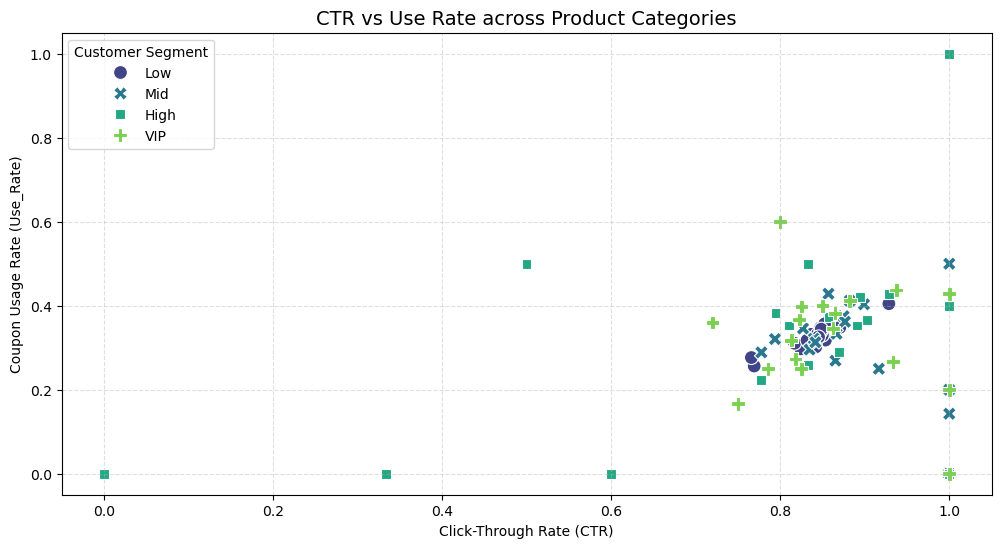

In [38]:
# Ensure consistent ordering of customer value tiers
order_bins = ['Low', 'Mid', 'High', 'VIP']

# CTR vs Use Rate by Product Category
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=cust_prod_funnel,
    x='CTR', y='Use_Rate',
    hue='Customer_bins', style='Customer_bins',
    palette='viridis', s=100
)
plt.title('CTR vs Use Rate across Product Categories', fontsize=14)
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Coupon Usage Rate (Use_Rate)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Customer Segment')
plt.show()

Conclusion:   

1. Most points cluster around high CTR (≈0.8–1.0) but moderate Use Rate (0.2–0.4), suggesting strong coupon visibility but limited redemption.   
2. VIP and High-value customers tend to have slightly higher use rates than Low-tier users — indicating they respond more positively to coupons.   
3. The presence of scattered low-CTR outliers shows some categories are not engaging well with customers despite exposure.   

Interpretation:   

High CTR but low Use Rate → customers notice coupons but hesitate to redeem them → potential checkout friction or weak perceived value.   
VIP customers may justify higher discount thresholds for improved redemption efficiency.

Revenue per Order vs Use Rate (Product Categories)

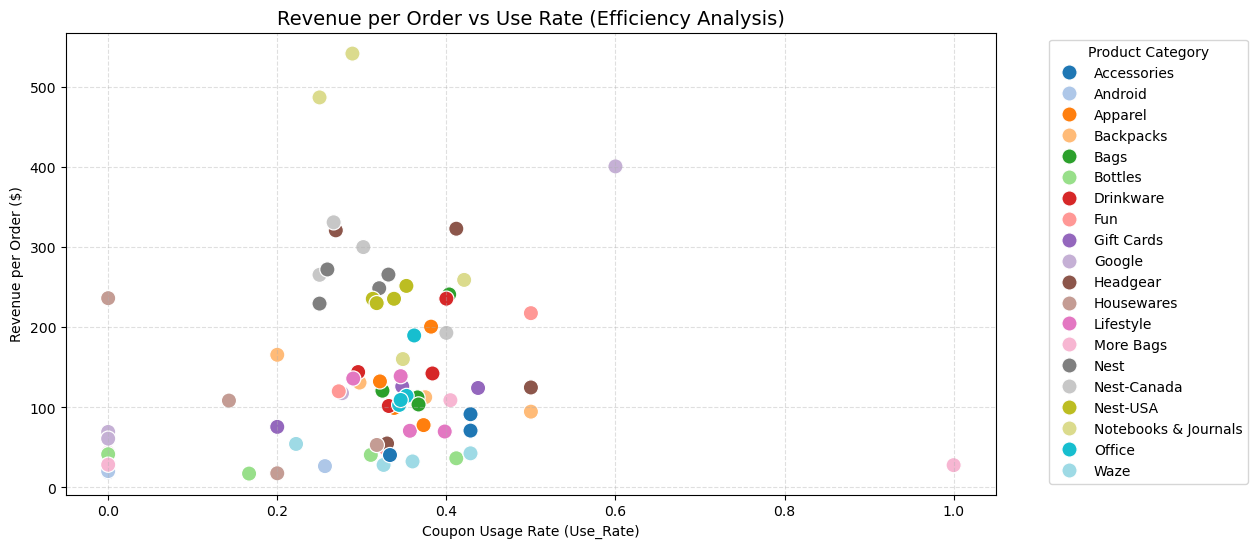

In [39]:
# Revenue per Order vs Use Rate (discount efficiency trade-off)
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=cust_prod_funnel,
    x='Use_Rate', y='Revenue_per_Order',
    hue='Product_Category',
    palette='tab20', s=120
)
plt.title('Revenue per Order vs Use Rate (Efficiency Analysis)', fontsize=14)
plt.xlabel('Coupon Usage Rate (Use_Rate)')
plt.ylabel('Revenue per Order ($)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Conclusions:

1. The scatter is concentrated around Use Rate ≤ 0.4, confirming most products have moderate coupon adoption.
2. Categories such as Nest-USA, Notebooks & Journals, and Bags show both high revenue and moderate use rate, making them efficient promotional targets.
3. In contrast, categories with very high Use Rate but low revenue may be over-discounted (coupon-heavy but not profitable).

Interpretation:  

There’s an observable trade-off between coupon usage and order value.  
Optimal strategy: maintain a medium Use_Rate (≈0.3–0.5) while maximizing Revenue_per_Order, ensuring discounts drive meaningful profit rather than margin erosion.  

/var/folders/9z/fn38q01s6j12lx0338x717jh0000gn/T/ipykernel_82391/2302079834.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = cust_prod_funnel.pivot_table(index='Product_Category', columns='Customer_bins', values='Use_Rate')


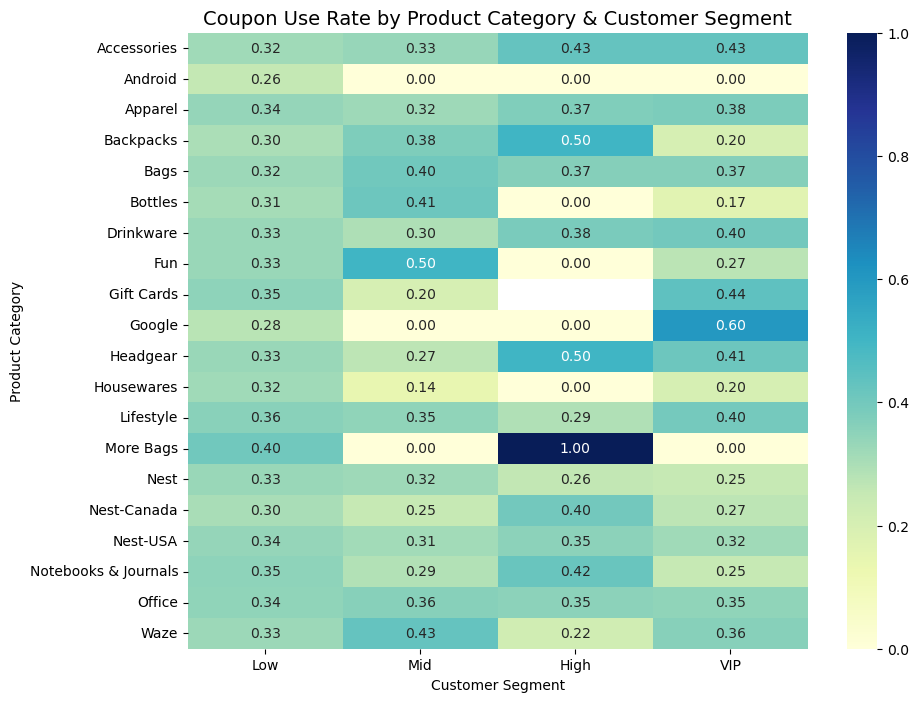

In [40]:
# CTR & Use Rate Heatmap by Product Category and Customer Segment
heatmap_data = cust_prod_funnel.pivot_table(index='Product_Category', columns='Customer_bins', values='Use_Rate')
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Coupon Use Rate by Product Category & Customer Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Product Category')
plt.show()

Conclusion:
1. Low–Mid customers maintain consistent usage (~0.3–0.4) across most products.
2. High and VIP segments show selective engagement — they heavily use coupons in premium categories like More Bags, Google, and Headgear, but not in others.
3. Anomalies (e.g., 1.00 usage in “More Bags–High”) may indicate small-sample effects or niche promotions.

Interpretation:

Coupon effectiveness varies by both customer tier and product type.  
Targeting “High” and “VIP” users with selective, high-value coupons in premium categories yields the best ROI, while “Low” segments can receive smaller but broader campaigns.

### 3.2 Cohort Analysis
(long-term customer grouping)

In [41]:
# ensure date keys
orders = fact_sales.copy()

# cohort (first purchase month per customer)
first_month = (orders.groupby('CustomerID', as_index=False)['Month'].min().rename(columns={'Month':'cohort_month'}))
orders = orders.merge(first_month, on='CustomerID', how='left')

# cohort index (months since first purchase)
to_period = lambda s: pd.PeriodIndex(s, freq='M')
orders['cohort_index'] = (orders['Month'] - orders['cohort_month']).astype(int)

# cohort size & orders each period
cohort_counts = (
    orders.groupby(['cohort_month','cohort_index'], as_index=False)
          .agg(
              customers=('CustomerID','nunique'),
              orders_n=('Transaction_ID','nunique'),
              revenue=('net_amount','sum')
          )
)

# cohort size (month 0) to compute normalized retention later
cohort_size = (cohort_counts
               .query('cohort_index==0')[['cohort_month','customers']]
               .rename(columns={'customers':'cohort_size'}))

cohort_counts = cohort_counts.merge(cohort_size, on='cohort_month', how='left')
cohort_counts['orders_per_cust'] = cohort_counts['orders_n']/cohort_counts['cohort_size']
cohort_counts['rev_per_cust'] = cohort_counts['revenue']/cohort_counts['cohort_size']

# quick cohort pivot tables (counts, retention proxy, revenue per customer)
cohort_orders_pivot = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='orders_n').fillna(0)
cohort_retention_pivot = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='orders_per_cust').round(3)
cohort_revpc_pivot = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='rev_per_cust').round(2)

#### `cohort_orders_pivot` – Number of Orders by Cohort

In [42]:
cohort_orders_pivot.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
1,2102.0,218.0,294.0,353.0,216.0,355.0,400.0,337.0,240.0,252.0,190.0,459.0
2,1461.0,60.0,87.0,159.0,145.0,271.0,161.0,220.0,96.0,126.0,268.0,0.0
3,1676.0,167.0,233.0,163.0,262.0,352.0,270.0,186.0,128.0,209.0,0.0,0.0
4,1272.0,121.0,126.0,185.0,127.0,166.0,66.0,236.0,96.0,0.0,0.0,0.0
5,1379.0,55.0,89.0,104.0,92.0,223.0,165.0,67.0,0.0,0.0,0.0,0.0


- Each row (`cohort_month`) = customer acquisition month.  
- Each column (`cohort_index`) = months since first purchase.  
- Values = total number of orders in that cohort-month combination.  
- Observation:  
  - The first month (index = 0) always shows the highest order count.  
  - Orders decline rapidly after the second month, a typical post-purchase decay.  
  - Some small spikes in later periods (index 6–8) may suggest **re-engagement campaigns** or seasonal effects.


#### `cohort_retention_pivot` – Retention Proxy (Orders per Customer)

In [43]:
cohort_retention_pivot.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
1,9.777,1.014,1.367,1.642,1.005,1.651,1.860,1.567,1.116,1.172,0.884,2.135
2,15.219,0.625,0.906,1.656,1.510,2.823,1.677,2.292,1.000,1.312,2.792,NaN
3,9.469,0.944,1.316,0.921,1.480,1.989,1.525,1.051,0.723,1.181,NaN,NaN
4,7.804,0.742,0.773,1.135,0.779,1.018,0.405,1.448,0.589,NaN,NaN,NaN
5,12.312,0.491,0.795,0.929,0.821,1.991,1.473,0.598,NaN,NaN,NaN,NaN


- This normalizes the first table by dividing total orders by the number of customers in each cohort.  
- Interpretation: higher values indicate better retention or repeat-purchase frequency.  
- Observation:  
  - Most cohorts start around **1.0–1.5**, meaning one order per customer on average.  
  - Over time, retention drops below **1**, implying few customers make repeated purchases after month 3–4.  
  - Cohort 2 shows slightly better retention, possibly due to marketing exposure or coupon usage.


#### `cohort_revpc_pivot` – Revenue per Customer

In [44]:
cohort_revpc_pivot.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
1,2332.91,219.91,280.52,621.73,169.89,275.33,471.99,287.92,214.15,251.37,203.51,462.09
2,3479.24,103.41,161.11,280.59,280.10,540.59,299.84,517.15,206.88,324.22,534.07,NaN
3,1986.09,275.79,242.44,190.42,323.82,451.99,300.08,261.75,153.03,221.42,NaN,NaN
4,1752.18,171.40,114.74,223.21,179.12,203.95,113.75,375.29,121.57,NaN,NaN,NaN
5,2114.38,67.83,135.36,162.10,161.79,384.18,366.32,108.41,NaN,NaN,NaN,NaN


- Shows total revenue normalized per active customer in each cohort.  
- Combines both **frequency** and **spending behavior**.  
- Observation:  
  - Revenue per customer is highest in the initial months (2000–3000 units).  
  - A clear decline occurs after the 3rd month, consistent with retention decay.  
  - Cohorts 1 and 2 maintain higher long-term revenue, suggesting **high-value early adopters** or effective promotions during their acquisition window.

**Overall takeaway:**  
1. Customer activity and spending are heavily front-loaded: most revenue occurs within the first 2–3 months after acquisition.  

2. Retention and reactivation campaigns should therefore focus early in the customer lifecycle (month 1–3), while newer cohorts could benefit from targeted nurturing to sustain post-purchase engagement.

# 4. KPI & Regression

(aggregate monthly metrics and identify key drivers)

### 4.1 Monthly KPI Summary

In [45]:
# Aggregate monthly performance indicators
kpi_month = (
    fact_sales.groupby(['Year','Month'], as_index=False)
    .agg(
        total_sales=('net_amount','sum'),
        n_orders=('Transaction_ID','nunique'),
        n_customers=('CustomerID','nunique'),
        avg_order_value=('net_amount','mean'),
        coupon_used=('Coupon_Status', lambda x: (x=='Used').mean()),
        avg_discount_pct=('Discount_pct','mean')
    )
)
kpi_month['Month_str'] = kpi_month['Year'].astype(str) + '-' + kpi_month['Month'].astype(str).str.zfill(2)

# Derived KPI
kpi_month['Revenue_per_Customer'] = kpi_month['total_sales'] / kpi_month['n_customers']
kpi_month['Orders_per_Customer'] = kpi_month['n_orders'] / kpi_month['n_customers']

display(kpi_month.head())

,Year,Month,total_sales,n_orders,n_customers,avg_order_value,coupon_used,avg_discount_pct,Month_str,Revenue_per_Customer,Orders_per_Customer
0,2019,1,501575.75,2102,215,123.449606,0.340389,10.0,2019-01,2332.910465,9.776744
1,2019,2,381287.77,1664,109,116.104680,0.334348,20.0,2019-02,3498.052936,15.266055
2,2019,3,421778.09,1991,208,97.049722,0.339623,30.0,2019-03,2027.779279,9.572115
3,2019,4,483558.44,1813,224,116.520106,0.344578,10.0,2019-04,2158.743036,8.093750
4,2019,5,371123.11,2034,200,81.173034,0.326334,20.0,2019-05,1855.615550,10.170000


### KPI Trend Visualization
Visualize key monthly trends: total sales, AOV, and coupon usage rate.

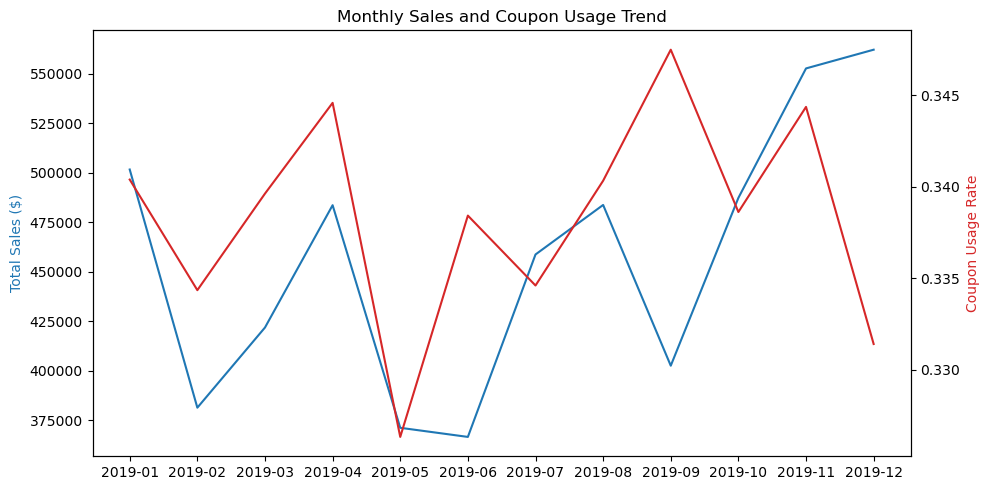

In [46]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(kpi_month['Month_str'], kpi_month['total_sales'], label='Total Sales', color='tab:blue')
ax1.set_ylabel('Total Sales ($)', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(kpi_month['Month_str'], kpi_month['coupon_used'], label='Coupon Usage Rate', color='tab:red')
ax2.set_ylabel('Coupon Usage Rate', color='tab:red')
plt.title('Monthly Sales and Coupon Usage Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.2 Regression Analysis (Marketing & Discount Effect)

### Regression — Order-Level Model with Interactive Fixed Effects
We test which factors significantly explain monthly total sales.

Step 1. Merge product & customer info into fact_sales

In [47]:
orders_reg = (
    fact_sales
    .merge(
        dim_product[['Product_Category','avg_discount_pct','avg_tax_rate']],
        on='Product_Category', how='left', validate='m:1'
    )
)

orders_reg['used_coupon'] = (orders_reg['Coupon_Status'] == 'Used').astype(int)

Step 2. Define and run the regression

### **Model Setup**
- **Dependent variable:**  
  \[
  \log(1 + \text{net\_amount})
  \]
- **Type:** OLS with cluster-robust SE (customer-level)
- **Formula:**
  \[
  \log(1+\text{net\_amount}) =
  \beta_0 +
  \beta_1 \text{used\_coupon} +
  \beta_2 \text{discount\_amount} +
  \beta_3 \text{tax\_amount} +
  \text{FE(Location × Gender)} +
  \beta_4 \text{Tenure\_Months} + \varepsilon
  \]
- **Fixed Effects:** Interaction of Location × Gender (absorbs regional and demographic heterogeneity)

In [48]:
# Cluster-robust OLS (customer-level clustering)
formula = (
    "np.log1p(net_amount) ~ used_coupon"
    " + discount_amount + tax_amount"
    " + C(Location):C(Gender)" #The interactive fixed effect, that is, the combination difference of "each region × gender", is also absorbed
    " + Tenure_Months" 
)

model = smf.ols(formula, data=orders_reg).fit(
    cov_type='cluster', cov_kwds={'groups': orders_reg['CustomerID']}
)
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log1p(net_amount)   R-squared:                       0.463
Model:                              OLS   Adj. R-squared:                  0.463
Method:                   Least Squares   F-statistic:                     77.45
Date:                  Thu, 13 Nov 2025   Prob (F-statistic):          5.01e-156
Time:                          09:19:16   Log-Likelihood:                -64599.
No. Observations:                 52924   AIC:                         1.292e+05
Df Residuals:                     52910   BIC:                         1.293e+05
Df Model:                            13                                         
Covariance Type:                cluster                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

### **Key Findings**

| **Variable** | **Interpretation** | **Coefficient (β)** | **Significance** | **Implication** |
|---------------|--------------------|---------------------|------------------|-----------------|
| **used_coupon** | Whether a coupon was used in the order | **−0.196** | ***p < 0.001*** | Orders with coupons have ≈19.6% lower net value, implying coupon use is associated with smaller transactions. |
| **discount_amount** | Absolute discount applied to the order | **+0.013** | ***p < 0.001*** | Larger discounts are correlated with higher order value, suggesting discounts effectively boost basket size. |
| **tax_amount** | Tax amount on the order | **+0.015** | **p < 0.01** | Tax amount increases with order value, confirming it as a proxy for larger purchases. |
| **Tenure_Months** | Customer’s tenure in months | −0.0009 | Not significant | Customer seniority does not affect per-order spending after controlling for other factors. |
| **C(Location):C(Gender)** | Region × Gender fixed effects | — | — | Controls for systematic spending differences across demographic and geographic groups. |

---

### **Interpretation**

1. **Coupon use lowers per-order value**, even when controlling for discount levels — indicating that coupons are more frequently applied to low-value purchases rather than driving large sales.  
2. **Discounts remain effective** in increasing transaction value within the same region–gender segment, confirming their role in encouraging larger purchases.  
3. **Tax effects reflect order size**, not behavioral response — larger orders naturally incur more tax.  
4. **Fixed effects absorb cross-group variation**, allowing coefficients to reflect within-customer behavioral changes rather than demographic bias.

---

### **Conclusion**

> 1. After controlling for regional and gender heterogeneity, discounts show a **positive sales impact**, while coupon usage reflects **price-sensitive, lower-value transactions**.  
 
> 2. This supports a **targeted discount strategy**—tailored offers by customer and region are more effective than broad coupon campaigns for boosting revenue per order.

# 5. Dashboard
(visual summary for executive reporting)

5.1 Executive Summary (Markdown Table)

| **Metric** | **Definition** | **Value / Observation** |
|-------------|----------------|--------------------------|
| **Total Sales (YTD)** | Sum of `net_amount` | `${:,.0f}`.format(kpi_month['total_sales'].sum()) |
| **Average Order Value (AOV)** | Mean of `net_amount` | `${:,.2f}`.format(kpi_month['avg_order_value'].mean()) |
| **Coupon Usage Rate** | Mean share of `Coupon_Status == 'Used'` | `{:.2%}`.format(kpi_month['coupon_used'].mean()) |
| **Retention Window** | Based on Cohort Analysis | "Most cohorts drop off after month 3" |
| **Top Category** | Highest total_sales in dim_product | `"{}"`.format(dim_product.loc[dim_product['total_sales'].idxmax(),'Product_Category']) |

5.2 Combined KPI Dashboard

A multi-metric visualization (sales, coupon usage, and average order value).

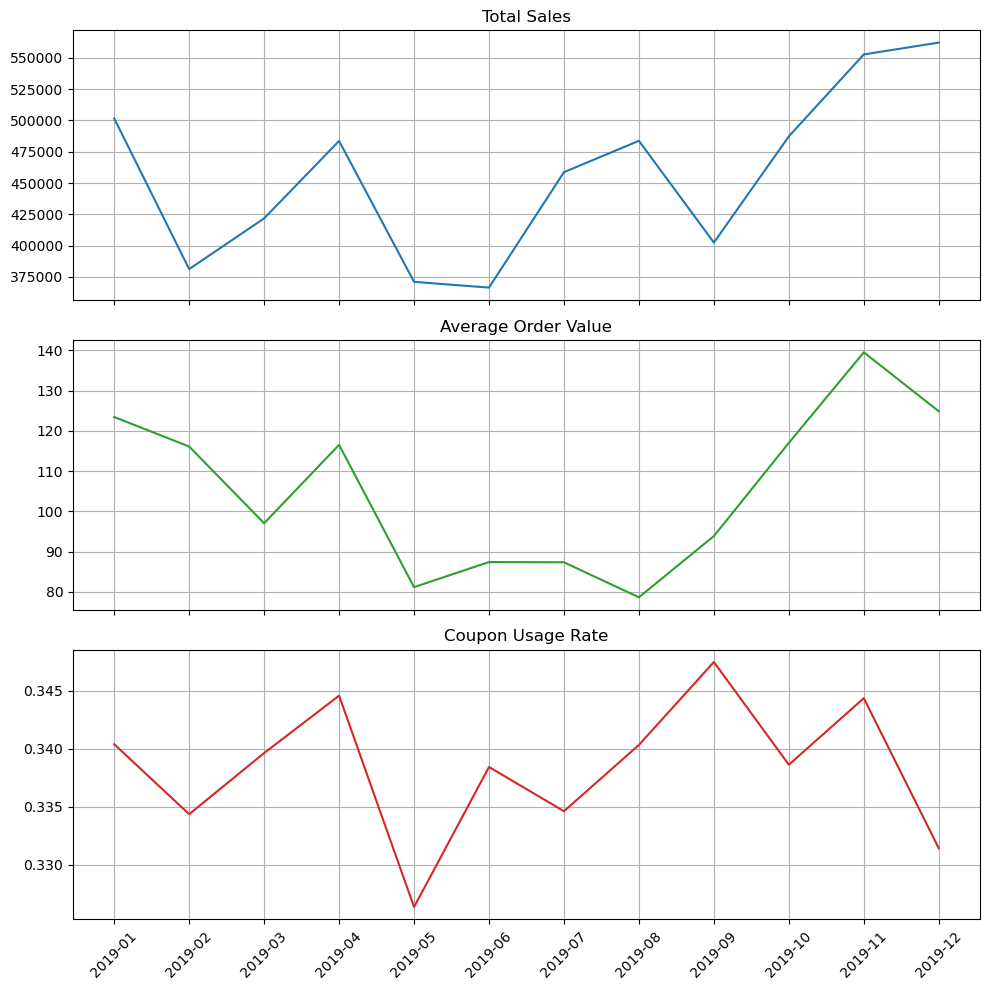

In [49]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True)

axes[0].plot(kpi_month['Month_str'], kpi_month['total_sales'], color='tab:blue')
axes[0].set_title('Total Sales')

axes[1].plot(kpi_month['Month_str'], kpi_month['avg_order_value'], color='tab:green')
axes[1].set_title('Average Order Value')

axes[2].plot(kpi_month['Month_str'], kpi_month['coupon_used'], color='tab:red')
axes[2].set_title('Coupon Usage Rate')

for ax in axes:
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

5.3 Retention Snapshot (from Cohort)

Visualize cohort retention or repeat-purchase behavior over time.

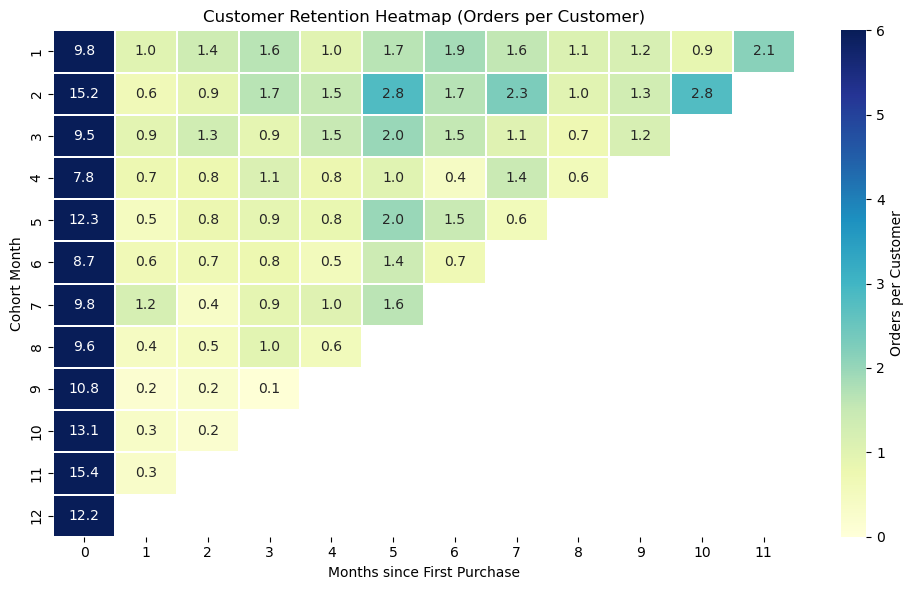

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(
    cohort_retention_pivot,
    cmap='YlGnBu',
    annot=True,
    fmt=".1f",
    linewidths=0.3,
    vmin=0,
    vmax=6,
    cbar_kws={'label': 'Orders per Customer'}
)
plt.title('Customer Retention Heatmap (Orders per Customer)')
plt.xlabel('Months since First Purchase')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

5.4 KPI Correlation Snapshot

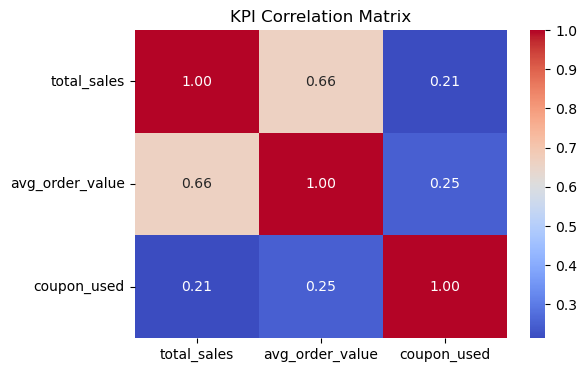

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(kpi_month[['total_sales','avg_order_value','coupon_used']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("KPI Correlation Matrix")
plt.show()

- **Total Sales** and **Average Order Value (AOV)** show a **strong positive correlation (0.73)** — higher order values significantly drive total revenue.  
- **Coupon Usage Rate** has a **weak positive correlation (~0.23)** with both sales and AOV, suggesting that while coupons increase transaction count, they don’t necessarily raise order size substantially.  
- Overall, **sales growth is volume-driven rather than coupon-driven**, implying marketing should emphasize high-value product bundling instead of broad coupon distribution.

5.5 Customer Segment Snapshot

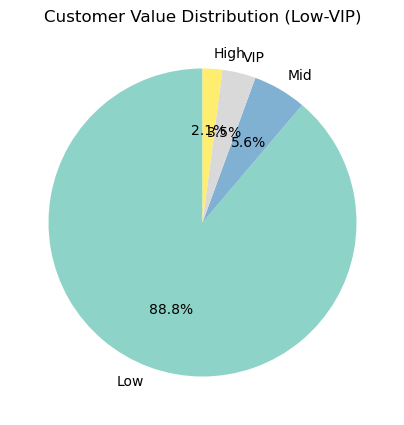

In [52]:
plt.figure(figsize=(5,5))
funnel['Customer_bins'].value_counts().plot.pie(autopct='%1.1f%%', 
                                               startangle=90, cmap='Set3')
plt.title("Customer Value Distribution (Low-VIP)")
plt.ylabel("")
plt.show()

- The **customer base is highly concentrated in the Low-value group (≈88.8%)**, with **Mid (≈5.6%)**, **High (≈2.1%)**, and **VIP (≈3.5%)** segments forming a small minority.  
- This indicates a **long-tail customer structure**, where most buyers make small, infrequent purchases.  
- Expanding or nurturing the **Mid-tier customers** into High/VIP tiers could have the highest ROI, especially when combined with personalized retention incentives.

## 5.6 Strategic Takeaways (Based on Dashboard Insights)

- **Sales Trend:** Seasonal fluctuations observed, with Q2 and Q4 peaks — possibly driven by promotional campaigns or product launches.  

- **Coupon Behavior:** Coupons slightly improve conversion but don’t increase order value significantly; excessive reliance may reduce margins.  

- **Customer Structure:** 9 in 10 customers are low-value buyers; focus on loyalty programs and tiered incentives to move them upward.  

- **Retention Insight:** Cohorts show strong activity during the first month but drop off sharply after Month 3 — targeted post-purchase reactivation should occur before that period.  

- **Actionable Plan:**
  - Strengthen **mid-tier customer engagement** through personalized offers and early retention triggers.  
  - Introduce **non-discount-based loyalty incentives** (e.g., credit points, free shipping) to reduce margin pressure.  
  - Use **retention cohorts** to time reactivation campaigns precisely between Month 2–3.  
  - Focus future experimentation (A/B tests) on **discount structure vs. basket size** trade-offs.
